In [39]:
import pandas as pd

In [40]:
ndb = pd.read_csv('zip_data.csv')
cdb = pd.read_csv('company_data.csv')

In [43]:
cdbz = cdb.groupby('ZIP').sum().reset_index()
cdbz.shape

(18, 2)

In [44]:
wdf = pd.merge(cdbz, ndb, on='ZIP', how='outer').reset_index()
wdf.shape

(214, 5)

In [45]:
wdf['EMPLOYEES'].fillna(0, inplace=True)
wdf['RESIDENTS'].fillna(0, inplace=True)
wdf['EMPLOYEES'] = wdf['EMPLOYEES'] * .272 // 1
wdf['TOTAL'] = wdf['EMPLOYEES'] + wdf['RESIDENTS']
wdf=wdf[['ZIP','TOTAL']]
wdf.shape

(214, 2)

In [49]:
sdf = pd.read_csv('top_zip_stations.csv')
sdf

,ZIP,STATION
0,10003,1 AV
1,10011,14 ST
2,10003,14 ST-UNION SQ
3,10011,18 ST
4,10010,23 ST
5,10011,23 ST
6,10001,28 ST
7,10016,28 ST
8,10003,3 AV
9,10016,33 ST


In [51]:
tsdf = pd.merge(sdf,wdf,how='inner',on='ZIP').reset_index()
tsdf['TECH_TOTAL'] = tsdf['TOTAL']
tsdf = tsdf[['ZIP','TECH_TOTAL','STATION']]

tsdf

,ZIP,TECH_TOTAL,STATION
0,10003,1279.0,1 AV
1,10003,1279.0,14 ST-UNION SQ
2,10003,1279.0,3 AV
3,10003,1279.0,8 ST-NYU
4,10003,1279.0,ASTOR PL
5,10011,2467.0,14 ST
6,10011,2467.0,18 ST
7,10011,2467.0,23 ST
8,10010,918.0,23 ST
9,10001,1950.0,28 ST


In [62]:
stations_mta =[
    '34 ST-PENN STA',
    'GRD CNTRL-42 ST',
    '34 ST-HERALD SQ',
    '23 ST',
    '14 ST-UNION SQ',
    'TIMES SQ-42 ST',
    'FULTON ST',
    '86 ST',
    '42 ST-PORT AUTH',
    '59 ST COLUMBUS',
    '125 ST',]

In [63]:
mta_data = pd.read_csv('output_stage2.csv')
mta_data['MTA_TOTALS'] = mta_data['ENTRY_DIFF']+mta_data['EXIT_DIFF']
mta_data = mta_data.loc[:,['STATION','DATE','MTA_TOTALS',]] 
mta_data= mta_data.groupby(['STATION','DATE']).sum().reset_index()
mta_data = mta_data.groupby('STATION').mean().reset_index()
mta_data.head()

,STATION,MTA_TOTALS
0,1 AV,41752.351648
1,103 ST,47437.725275
2,103 ST-CORONA,30471.054945
3,104 ST,3621.263736
4,110 ST,17537.208791


In [69]:
mta_select = mta_data.loc[mta_data['STATION'].isin(stations_mta),:].reset_index()
mta_select

,index,STATION,MTA_TOTALS
0,9,125 ST,121082.483516
1,14,14 ST-UNION SQ,173524.967033
2,45,23 ST,158378.252747
3,58,34 ST-HERALD SQ,184084.439560
4,60,34 ST-PENN STA,262622.076923
5,67,42 ST-PORT AUTH,144134.021978
6,85,59 ST COLUMBUS,112928.472527
7,109,86 ST,127295.285714
8,225,FULTON ST,150683.318681
9,232,GRD CNTRL-42 ST,223169.912088


In [95]:
merge_data = pd.merge(mta_data, tsdf, on='STATION',how='inner')
merge_data = merge_data.groupby(['STATION','ZIP']).sum().reset_index()

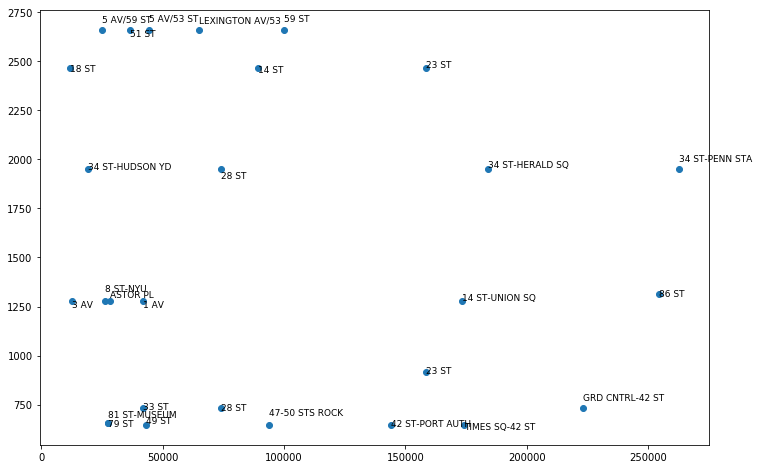

In [114]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(12,8))

y_cor = list((merge_data['MTA_TOTALS']))
x_cor = list((merge_data['TECH_TOTAL']))
stat =list(merge_data['STATION'])
plt.scatter(merge_data['MTA_TOTALS'],merge_data['TECH_TOTAL'])
for i in range(len(y_cor)):
    plt.text(int(y_cor[i]),int(x_cor[i])+random.randint(-50,50), stat[i],fontsize=9)
    

#ax.annotate(merge_data['STATION'],merge_data['MTA_TOTALS'],merge_data['TECH_TOTAL'])



# for i,type in enumerate(types):
#     x = x_coords[i]
#     y = y_coords[i]
#     plt.text(x_cor,y_cor,merge_data['STATION'], fontsize=9)
   